<a href="https://colab.research.google.com/github/shophiagithub/Customer-Segmentation-in-E-Commerce-KMeans-and-Hierarchical-Clustering-Approach/blob/main/Customer_Segmentation_in_E_Commerce_KMeans_and_Hierarchical_Clustering_Approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***VIP CLIENTS CLUSTERING***

###**CUSTOMER SEGMENTATION IN E-COMMERCE: A DATA SCIENCE APPROACH**
### **Introduction**
Customer segmentation is a crucial aspect of business strategy, especially in the dynamic world of e-commerce. It involves categorizing customers into distinct groups based on specific characteristics, behaviors, or preferences. The primary goal is to tailor marketing strategies, enhance customer experience, and optimize business operations. This project focuses on leveraging machine learning techniques, specifically KMeans clustering and RFM analysis, to achieve effective customer segmentation in an e-commerce setting.
### **Purpose of the project**
The primary purpose of this project is to identify and understand different customer segments within an e-commerce dataset. By employing clustering algorithms and RFM analysis, we aim to categorize customers into groups such as VIPs, average customers, and lapsed customers. The insights gained from customer segmentation can be instrumental in tailoring marketing strategies, improving customer engagement, and maximizing revenue for the e-commerce shop.
### **Benefits of Customer Segmentation in E-Commerce**
**1.Targeted Marketing:** Segmentation enables personalized marketing campaigns, delivering content and promotions tailored to specific customer segments.

**2.Revenue Optimization:** Improved targeting and customer engagement often result in increased sales and revenue for the e-commerce shop.

**3.Customer Retention**: By understanding customer behavior, e-commerce businesses can implement targeted retention strategies, reducing churn and fostering long-term relationships

### **RFM Analysis**
RFM analysis is a widely used method for customer segmentation, focusing on three key dimensions:

### **Recency (R)**
Recency represents how recently a customer made a purchase. It is calculated by measuring the time elapsed since the customer's last transaction. Customers who have made recent purchases are often more engaged and responsive.

### **Frequency (F)**
Frequency measures how often a customer makes purchases within a specified period. It provides insights into the loyalty and engagement level of customers. High-frequency customers are valuable contributors to overall revenue.

### **Monetary (M)**
Monetary value represents the total amount spent by a customer. It is a measure of the customer's financial contribution to the business. Customers with high monetary value are significant revenue drivers.

In [ ]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading the dataset
df=pd.read_csv('Ecommerce.csv',encoding='unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN


In [ ]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,7-Dec-17,0.85,12680.0,France,NaN
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,7-Dec-17,2.10,12680.0,France,NaN
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,7-Dec-17,4.15,12680.0,France,NaN
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,7-Dec-17,4.15,12680.0,France,NaN
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,7-Dec-17,4.95,12680.0,France,NaN


In [ ]:
#shape of the dataset
df.shape

(541909, 9)

In [ ]:
#converting the InvoiceDate column to datetime format
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'],format='%d-%b-%y',errors='coerce')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850.0,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850.0,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850.0,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850.0,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850.0,United Kingdom,NaN


In [ ]:
#computing the descriptive statistics
df.describe(include='all')

<ipython-input-111-210e80bf70fd>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909,0.0
unique,25900,4070,4223,NaN,305,NaN,NaN,38,NaN
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2017-12-03 00:00:00,NaN,NaN,United Kingdom,NaN
freq,1114,2313,2369,NaN,5331,NaN,NaN,495478,NaN
first,NaN,NaN,NaN,NaN,2016-11-29 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2017-12-07 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   Unnamed: 8   0 non-null       float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 37.2+ MB


In [ ]:
df.replace('',np.nan,inplace=True)
missing_val=df.isnull()

In [ ]:
df['Unnamed: 8'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Unnamed: 8, dtype: float64

In [ ]:
print(df.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Unnamed: 8'],
      dtype='object')


In [ ]:
df=df.drop(columns="Unnamed: 8")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850.0,United Kingdom


In [ ]:
#checking for missing values
missing_values=df.isnull().sum()
print(missing_values)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


/usr/local/lib/python3.10/dist-packages/missingno/missingno.py:61: UserWarning: Plotting a sparkline on an existing axis is not currently supported. To remove this warning, set sparkline=False.
  warnings.warn(


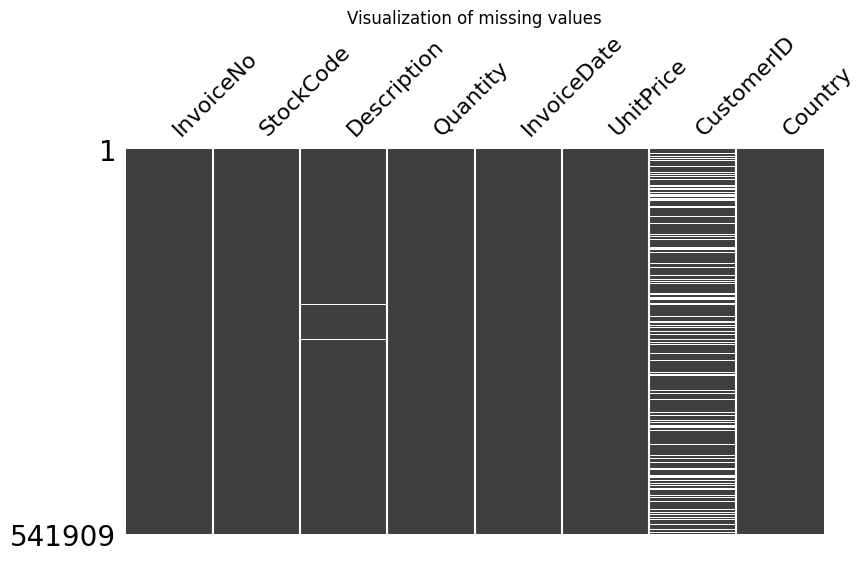

In [ ]:
import missingno as msno
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(9,5))
msno.matrix(df,ax=ax)
plt.title('Visualization of missing values')
plt.show()

In [ ]:
#selecting the customerID column without any missing values
df=df[pd.notnull(df['CustomerID'])]
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [ ]:
df.shape

(406829, 8)

### **REMOVING THE DUPLICATE VALUES**

In [ ]:
print('there are {} duplicates present in the dataset'.format(df.duplicated().sum()))
df[df.duplicated(keep=False)].head(10)

there are 5226 duplicates present in the dataset


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2016-11-29,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2016-11-29,2.10,17908.0,United Kingdom
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2016-11-29,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2016-11-29,1.25,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2016-11-29,2.95,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2016-11-29,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2016-11-29,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2016-11-29,4.95,17908.0,United Kingdom
548,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2016-11-29,2.95,17920.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2016-11-29,2.95,17920.0,United Kingdom


In [ ]:
df=df.drop_duplicates()
#checking for duplicates after removing it
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401603 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401603 non-null  object        
 1   StockCode    401603 non-null  object        
 2   Description  401603 non-null  object        
 3   Quantity     401603 non-null  int64         
 4   InvoiceDate  401603 non-null  datetime64[ns]
 5   UnitPrice    401603 non-null  float64       
 6   CustomerID   401603 non-null  float64       
 7   Country      401603 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


In [ ]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [ ]:
df.Country.replace(['Unspecified','USA','RSA','EIRE'],['United Kingdom','United states of America','Republic of South Africa','Ireland'],inplace=True)
df.Country.value_counts().head()

United Kingdom    356968
Germany             9480
France              8475
Ireland             7475
Spain               2528
Name: Country, dtype: int64

In [ ]:
#filter customers by the top 10 countries in percentage
df.Country.value_counts(normalize=True)[:10]

United Kingdom    0.888858
Germany           0.023605
France            0.021103
Ireland           0.018613
Spain             0.006295
Netherlands       0.005904
Belgium           0.005152
Switzerland       0.004674
Portugal          0.003663
Australia         0.003132
Name: Country, dtype: float64

united states alone accounts for 88% of all countries

<Axes: >

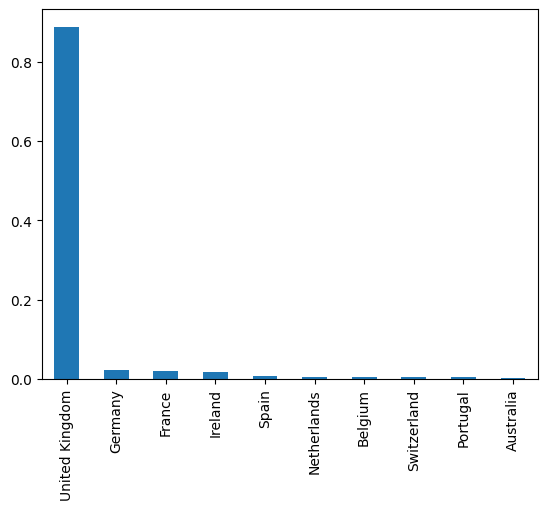

In [ ]:
#visualizing the top 10 countries
df.Country.value_counts(normalize=True)[:10].plot(kind='bar')

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,401603.000000,401603.000000,401603.000000
mean,12.183298,3.474067,15281.162093
std,250.283348,69.764122,1714.008032
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


NOTE: The minimum value for quantity is negative and for unitprice is zero.Upon careful study of the data description from UCI Machine Learning Repository website where this dataset is obtained, it is discovered that some transaction records in this dataset are "cancellations".This is indicated by the InvoiceNO column having values starting from letter "C"

In [ ]:
df=df[(df['Quantity']>0) & (df['UnitPrice']>0)]
df.describe()

,Quantity,UnitPrice,CustomerID
count,392691.000000,392691.000000,392691.000000
mean,13.119730,3.125917,15287.845186
std,180.493061,22.241864,1713.541531
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


In [ ]:
df.shape

(392691, 8)

## **COHORT ANALYSIS**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392691 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392691 non-null  object        
 1   StockCode    392691 non-null  object        
 2   Description  392691 non-null  object        
 3   Quantity     392691 non-null  int64         
 4   InvoiceDate  392691 non-null  datetime64[ns]
 5   UnitPrice    392691 non-null  float64       
 6   CustomerID   392691 non-null  float64       
 7   Country      392691 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB


In [ ]:
# creating an invoice month
import datetime as dt
def get_month(x):
  return dt.datetime(x.year,x.month,1)
#applying the function to all rows
df['InvoiceMonth']=df['InvoiceDate'].apply(get_month)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850.0,United Kingdom,2016-11-01
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850.0,United Kingdom,2016-11-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850.0,United Kingdom,2016-11-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850.0,United Kingdom,2016-11-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850.0,United Kingdom,2016-11-01


In [ ]:
#create a column index with the minimum invoice date aka first time customer was aquired
df['CohortMonth']=df.groupby('CustomerID')['InvoiceMonth'].transform('min')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850.0,United Kingdom,2016-11-01,2016-11-01
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850.0,United Kingdom,2016-11-01,2016-11-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850.0,United Kingdom,2016-11-01,2016-11-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850.0,United Kingdom,2016-11-01,2016-11-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850.0,United Kingdom,2016-11-01,2016-11-01


In [ ]:
#create a data elememt function to get a series for subtraction
def get_data_elements(df,column):
  day=df[column].dt.day
  month=df[column].dt.month
  year=df[column].dt.year
  return day,month,year

In [ ]:
#calling the function
_,Invoice_month,Invoice_year=get_data_elements(df,'InvoiceMonth')
_,Cohort_month,Cohort_year=get_data_elements(df,'CohortMonth')
Invoice_month[:10]

0    11
1    11
2    11
3    11
4    11
5    11
6    11
7    11
8    11
9    11
Name: InvoiceMonth, dtype: int64

In [ ]:
#creating a cohort index
year_diff=Invoice_year-Cohort_year
month_diff=Invoice_month-Cohort_month
df['CohortIndex']=year_diff*12+month_diff+1
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850.0,United Kingdom,2016-11-01,2016-11-01,1
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850.0,United Kingdom,2016-11-01,2016-11-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850.0,United Kingdom,2016-11-01,2016-11-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850.0,United Kingdom,2016-11-01,2016-11-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850.0,United Kingdom,2016-11-01,2016-11-01,1


In [ ]:
#count the customerID by grouping the cohortmonth and cohortindex
cohort_data=df.groupby(['CohortMonth','CohortIndex'])['CustomerID'].apply(pd.Series.nunique).reset_index()
cohort_data

,CohortMonth,CohortIndex,CustomerID
0,2016-11-01,1,188
1,2016-11-01,2,71
2,2016-11-01,3,69
3,2016-11-01,4,62
4,2016-11-01,5,68
...,...,...,...
100,2017-10-01,2,92
101,2017-10-01,3,36
102,2017-11-01,1,305
103,2017-11-01,2,19


In [ ]:
#create a pivot table
Cohort_table=cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='CustomerID')
Cohort_table

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13,14
CohortMonth,,,,,,,,,,,,,,
2016-11-01,188.0,71.0,69.0,62.0,68.0,69.0,74.0,72.0,62.0,69.0,74.0,72.0,92.0,33.0
2016-12-01,697.0,267.0,220.0,269.0,238.0,278.0,243.0,246.0,248.0,263.0,280.0,363.0,150.0,NaN
2017-01-01,472.0,95.0,126.0,107.0,153.0,132.0,121.0,120.0,137.0,150.0,172.0,38.0,NaN,NaN
2017-02-01,368.0,62.0,63.0,106.0,95.0,87.0,85.0,101.0,95.0,111.0,17.0,NaN,NaN,NaN
2017-03-01,425.0,62.0,112.0,83.0,101.0,75.0,107.0,107.0,112.0,32.0,NaN,NaN,NaN,NaN
2017-04-01,288.0,61.0,58.0,60.0,58.0,63.0,63.0,77.0,15.0,NaN,NaN,NaN,NaN,NaN
2017-05-01,297.0,60.0,49.0,49.0,61.0,71.0,85.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-01,230.0,43.0,38.0,58.0,57.0,74.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-01,203.0,36.0,39.0,45.0,53.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#retention table
new_cohort_table=Cohort_table.divide(Cohort_table.iloc[:,0],axis=0)
new_cohort_table.round(3)*100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13,14
CohortMonth,,,,,,,,,,,,,,
2016-11-01,100.0,37.8,36.7,33.0,36.2,36.7,39.4,38.3,33.0,36.7,39.4,38.3,48.9,17.6
2016-12-01,100.0,38.3,31.6,38.6,34.1,39.9,34.9,35.3,35.6,37.7,40.2,52.1,21.5,NaN
2017-01-01,100.0,20.1,26.7,22.7,32.4,28.0,25.6,25.4,29.0,31.8,36.4,8.1,NaN,NaN
2017-02-01,100.0,16.8,17.1,28.8,25.8,23.6,23.1,27.4,25.8,30.2,4.6,NaN,NaN,NaN
2017-03-01,100.0,14.6,26.4,19.5,23.8,17.6,25.2,25.2,26.4,7.5,NaN,NaN,NaN,NaN
2017-04-01,100.0,21.2,20.1,20.8,20.1,21.9,21.9,26.7,5.2,NaN,NaN,NaN,NaN,NaN
2017-05-01,100.0,20.2,16.5,16.5,20.5,23.9,28.6,5.4,NaN,NaN,NaN,NaN,NaN,NaN
2017-06-01,100.0,18.7,16.5,25.2,24.8,32.2,6.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-07-01,100.0,17.7,19.2,22.2,26.1,8.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


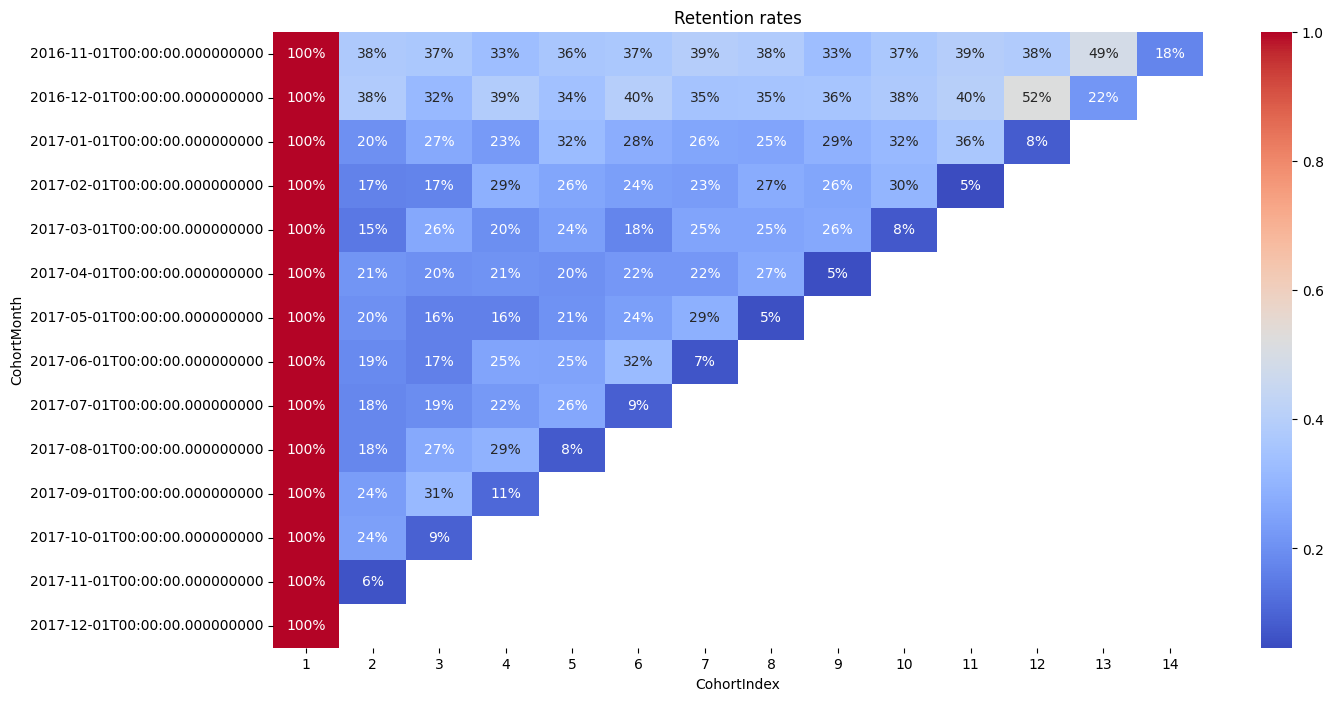

In [ ]:
#visualizing the results in heatmap
#new_cohort_table.index=new_cohort_table.index.strftime('%B %Y')
plt.figure(figsize=(15,8))
plt.title('Retention rates')
sns.heatmap(new_cohort_table,annot=True,cmap='coolwarm',fmt='.0%')
plt.show()

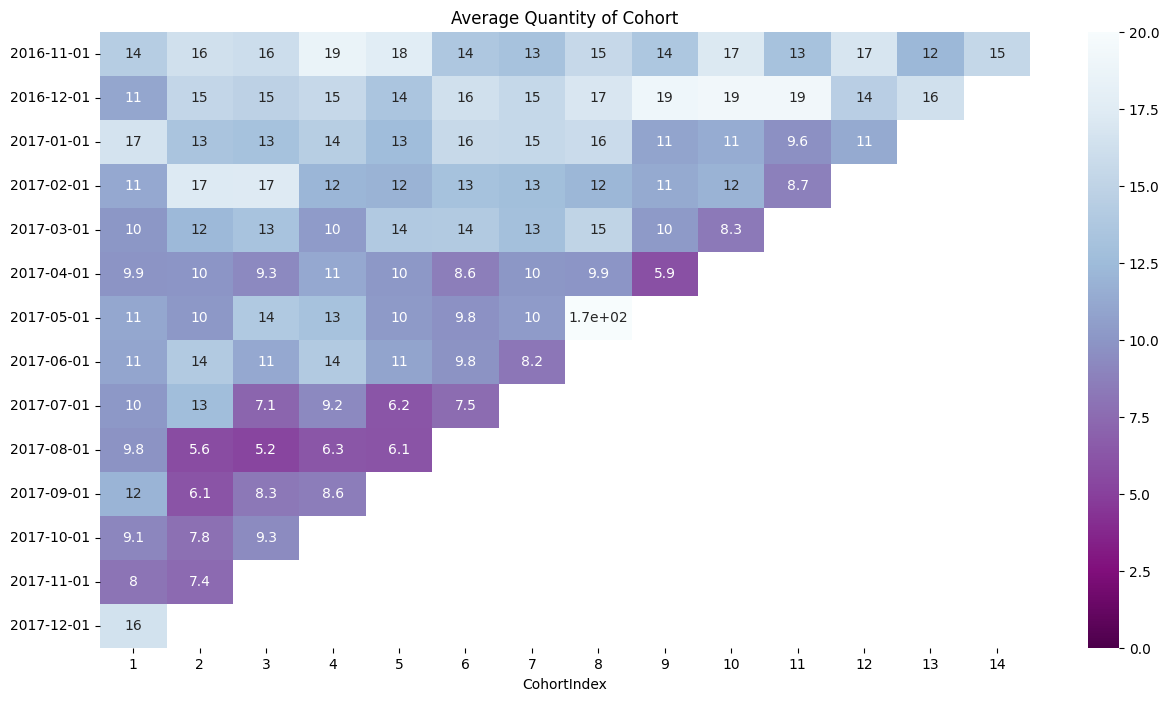

In [ ]:
#visualizing the average quantity for each cohort
grouping=df.groupby(['CohortMonth','CohortIndex'])['Quantity'].mean()
cohort_d=grouping
cohort_d=cohort_d.reset_index()
average_quantity=cohort_d.pivot(index='CohortMonth',columns='CohortIndex',values='Quantity')
average_quantity.round(1)
average_quantity.index=average_quantity.index.date

#building the heatmap
plt.figure(figsize=(15,8))
sns.heatmap(average_quantity,annot=True,vmin=0,vmax=20,cmap="BuPu_r")
plt.title('Average Quantity of Cohort')
plt.show()

## **RFM ANALYSIS**

In [ ]:
# calculating the total sum
df['TotalSum']=df['UnitPrice']*df['Quantity']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex,TotalSum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850.0,United Kingdom,2016-11-01,2016-11-01,1,15.30
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850.0,United Kingdom,2016-11-01,2016-11-01,1,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850.0,United Kingdom,2016-11-01,2016-11-01,1,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850.0,United Kingdom,2016-11-01,2016-11-01,1,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850.0,United Kingdom,2016-11-01,2016-11-01,1,20.34


In [ ]:
print("Minimum invoice Date is",df['InvoiceDate'].dt.date.min(),"Maximum invoice date is",df['InvoiceDate'].dt.date.max())

Minimum invoice Date is 2016-11-29 Maximum invoice date is 2017-12-07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392691 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     392691 non-null  object        
 1   StockCode     392691 non-null  object        
 2   Description   392691 non-null  object        
 3   Quantity      392691 non-null  int64         
 4   InvoiceDate   392691 non-null  datetime64[ns]
 5   UnitPrice     392691 non-null  float64       
 6   CustomerID    392691 non-null  float64       
 7   Country       392691 non-null  object        
 8   InvoiceMonth  392691 non-null  datetime64[ns]
 9   CohortMonth   392691 non-null  datetime64[ns]
 10  CohortIndex   392691 non-null  int64         
 11  TotalSum      392691 non-null  float64       
dtypes: datetime64[ns](3), float64(3), int64(2), object(4)
memory usage: 38.9+ MB


In [ ]:
#calculating the recency ,Frequency and Monetary
day='2017-12-08'
day=pd.to_datetime('2017-12-08')
rfm=df.groupby(['CustomerID']).agg({'InvoiceDate': lambda x:(day-x.max()).days,'InvoiceNo':'count','TotalSum':'sum'})
rfm.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','TotalSum':'Monetary'},inplace=True)
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,3,182,4310.00
12348.0,76,31,1797.24
12349.0,19,73,1757.55
12350.0,311,17,334.40


In [ ]:
r_labels=range(4,0,-1)
f_labels=range(1,5)
m_labels=range(1,5)
#calculating the quartiles for recency ,frequency and monetary
r_quartiles=pd.qcut(rfm['Recency'],q=4,labels=r_labels)
f_quartiles=pd.qcut(rfm['Frequency'],q=4,labels=f_labels)
m_quartiles=pd.qcut(rfm['Monetary'],q=4,labels=m_labels)
rfm=rfm.assign(R=r_quartiles,F=f_quartiles,M=m_quartiles)
def add_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])
rfm['RFM_segment']=rfm.apply(add_rfm,axis=1)
rfm['RFM_score']=rfm[['R','F','M']].sum(axis=1)
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_segment,RFM_score
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,1,4,1.01.04.0,6
12347.0,3,182,4310.00,4,4,4,4.04.04.0,12
12348.0,76,31,1797.24,2,2,4,2.02.04.0,8
12349.0,19,73,1757.55,3,3,4,3.03.04.0,10
12350.0,311,17,334.40,1,1,2,1.01.02.0,4


## **ANALYZING THE RFM SEGMENTS**

In [ ]:
rfm.groupby(['RFM_segment']).size().sort_values(ascending=False)[:5]

RFM_segment
4.04.04.0    443
1.01.01.0    381
3.04.04.0    222
1.02.02.0    206
2.01.01.0    181
dtype: int64

In [ ]:
#filtering the RFM segments
rfm[rfm['RFM_segment']=='111'].head()

,Recency,Frequency,Monetary,R,F,M,RFM_segment,RFM_score
CustomerID,,,,,,,,


In [ ]:
rfm[rfm['RFM_segment']=='444'].head()

,Recency,Frequency,Monetary,R,F,M,RFM_segment,RFM_score
CustomerID,,,,,,,,


In [ ]:
#Summary metrics per RFM score
rfm.groupby(['RFM_score']).agg({'Recency':'mean','Frequency':'mean','Monetary':['mean','count']}).round(1)

Recency Frequency Monetary      
             mean      mean     mean count
RFM_score                                 
3           261.2       8.2    157.4   381
4           177.0      13.6    239.6   391
5           152.9      21.1    366.8   519
6            96.1      28.0    818.9   461
7            80.7      38.2    763.0   456
8            64.2      56.2    987.3   459
9            46.6      78.9   1804.5   410
10           33.0     110.9   2065.2   428
11           21.6     187.2   4050.3   390
12            7.6     371.0   9393.2   443

In [ ]:
# grouping the customers to gold,silver and bronze
def segments(rfm):
  if rfm['RFM_score']>9:
    return 'Gold'
  elif (rfm['RFM_score']>5) & (rfm['RFM_score']<=9):
    return 'Silver'
  else:
    return 'Bronze'
rfm['RFM_general']=rfm.apply(segments,axis=1)
rfm.groupby(['RFM_general']).agg({'Recency':'mean','Frequency':'mean','Monetary':['mean','count']}).round(1)


Recency Frequency Monetary      
               mean      mean     mean count
RFM_general                                 
Bronze        192.2      15.0    266.5  1291
Gold           20.6     225.9   5253.6  1261
Silver         72.6      49.5   1074.2  1786

In [ ]:
rfm_dist=rfm[['Recency','Frequency','Monetary']]
rfm_dist.describe()

,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000
mean,93.059474,90.523513,2048.687182
std,100.012264,225.505975,8985.229383
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,306.482500
50%,51.000000,41.000000,668.570000
75%,142.750000,98.000000,1660.597500
max,374.000000,7676.000000,280206.020000


From the above we could infer that the mean and variance are not equal

Solution: scaling the variables using standard scaler from the scikitlearn library

<ipython-input-154-018fe3bed9e2>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,1,1);sns.distplot(rfm.Recency,label='Recency')
<ipython-input-154-018fe3bed9e2>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3,1,1);sns.distplot(rfm.Recency,label='Recency')
<ipython-input-154-018fe3bed9e2>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axe

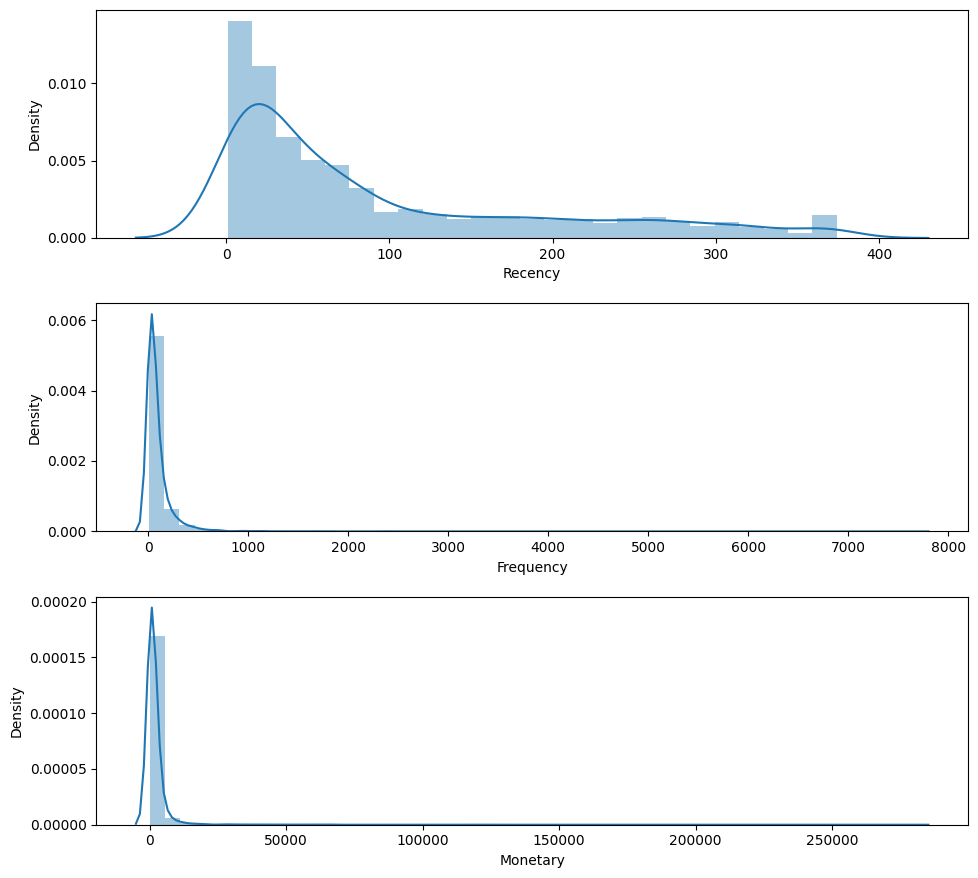

In [ ]:
f,ax=plt.subplots(figsize=(10,9))
plt.subplot(3,1,1);sns.distplot(rfm.Recency,label='Recency')
plt.subplot(3,1,2);sns.distplot(rfm.Frequency,label='Frequency')
plt.subplot(3,1,3);sns.distplot(rfm.Monetary,label='Monetary')
plt.style.use('fivethirtyeight')
plt.tight_layout()
plt.show()

from the above visualization we could infer that the data is skewed(unsymmetric distribution)

SOLUTION: Taking log transformation(positive values only ) will manage skewness

<ipython-input-155-f77a02f5af88>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,1,1);sns.distplot(rfm_log.Recency,label='Recency')
<ipython-input-155-f77a02f5af88>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(3,1,1);sns.distplot(rfm_log.Recency,label='Recency')
<ipython-input-155-f77a02f5af88>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot`

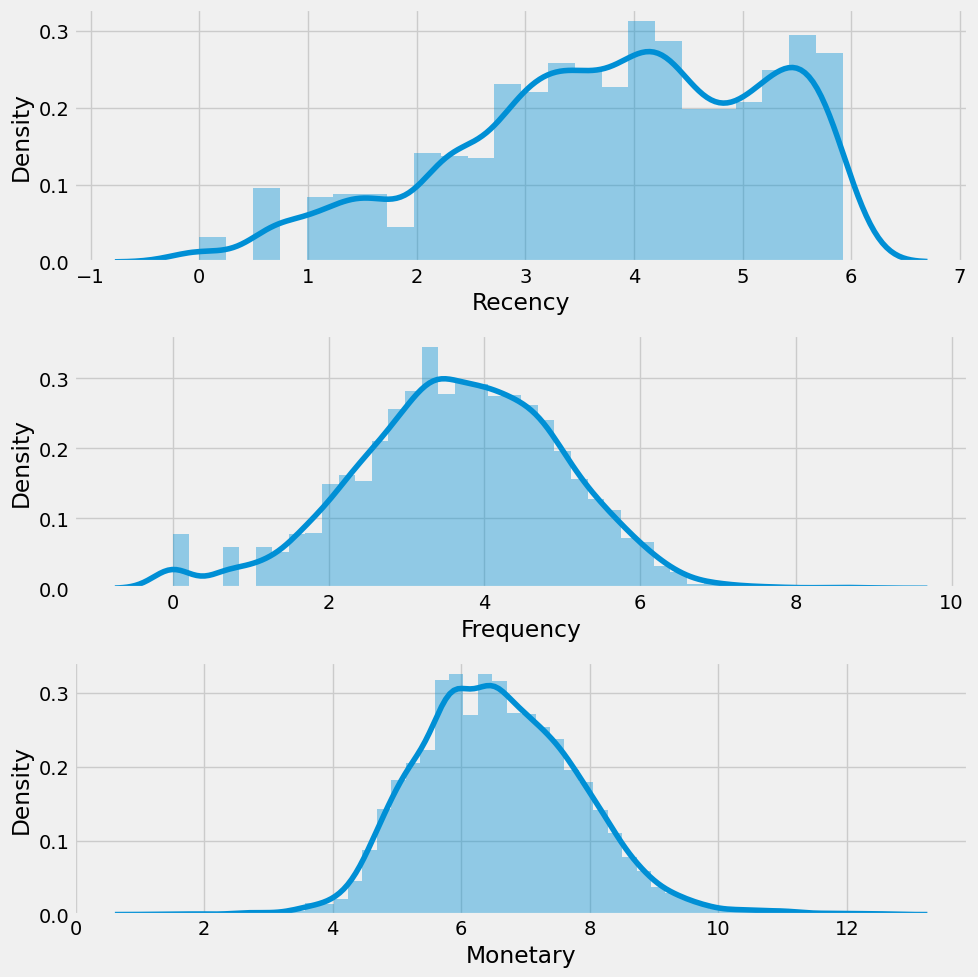

In [ ]:
rfm_log=rfm[['Recency','Frequency','Monetary']].apply(np.log,axis=1)

#visualizing the columns
f,ax=plt.subplots(figsize=(10,10))
plt.subplot(3,1,1);sns.distplot(rfm_log.Recency,label='Recency')
plt.subplot(3,1,2);sns.distplot(rfm_log.Frequency,label='Frequency')
plt.subplot(3,1,3);sns.distplot(rfm_log.Monetary,label='Monetary')
plt.tight_layout()
plt.show()

In [ ]:
#Normalizing the variables using standard scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(rfm_log)
rfm_normalized=scaler.transform(rfm_log)


In [ ]:
rfm_normalized=pd.DataFrame(rfm_normalized,columns=['Recency','Frequency','Monetary'])
rfm_normalized.head()
rfm_normalized_km=rfm_normalized.copy()
rfm_normalized_ac=rfm_normalized.copy()
rfm_normalized_ds=rfm_normalized.copy()

## **KMEANS CLUSTERING**

Elbow Method to determine the number of clusters to be formed


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

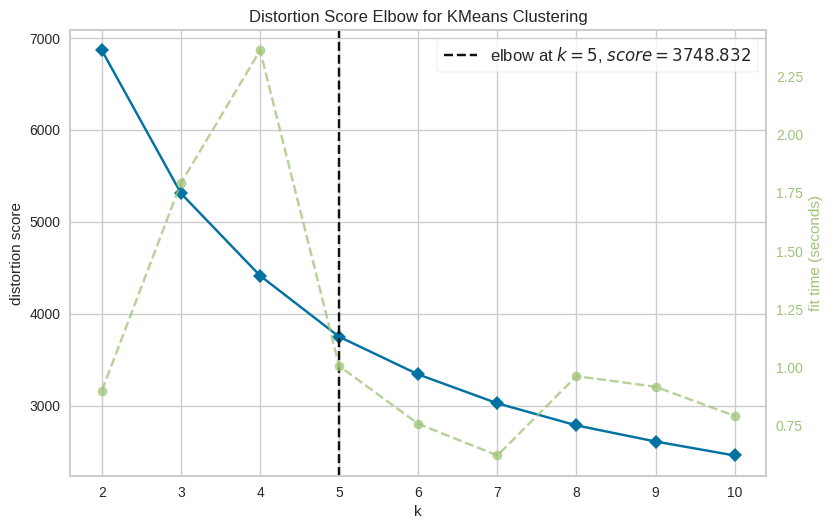

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
print('Elbow Method to determine the number of clusters to be formed')
Elbow_m=KElbowVisualizer(KMeans(),k=10)
Elbow_m.fit(rfm_normalized)
Elbow_m.show()

In [ ]:
kmeans=KMeans(n_clusters=5,n_init=1,random_state=10)#creating object
kmeans.fit(rfm_normalized_km)
rfm_normalized_km['Clusters']=(kmeans.labels_+1)

In [ ]:
rfm_normalized_km.head()

,Recency,Frequency,Monetary,Clusters
0,1.435416,-2.779979,3.700201,3
1,-1.953393,1.160357,1.413257,1
2,0.382865,-0.179855,0.719951,3
3,-0.619183,0.468643,0.702251,3
4,1.401368,-0.634745,-0.612996,2


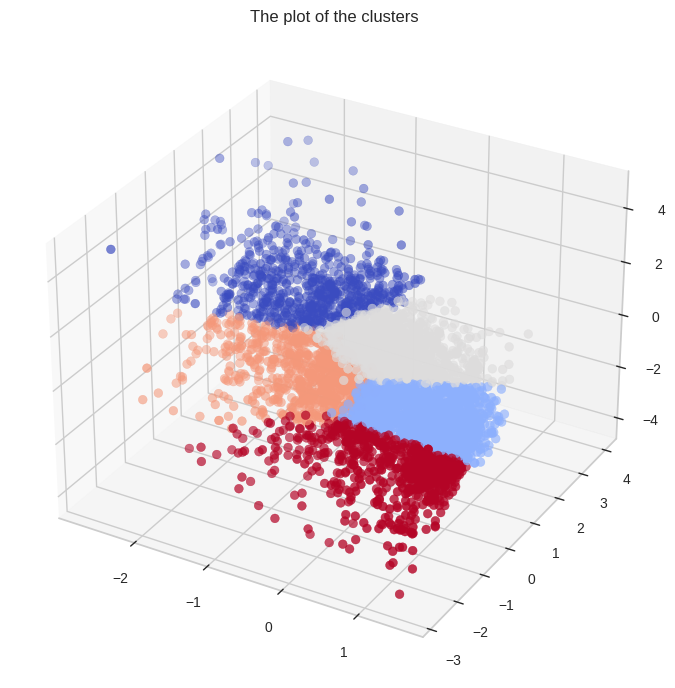

In [ ]:
#plotting the clusters
fig=plt.figure(figsize=(10,8))
ax=plt.subplot(111,projection='3d',label="bla")
ax.scatter(rfm_normalized_km['Recency'],rfm_normalized_km['Frequency'],rfm_normalized_km['Monetary'],s=40,c=rfm_normalized_km['Clusters'],marker='o',cmap='coolwarm')
ax.set_title("The plot of the clusters")
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
silhouette=silhouette_score(rfm_normalized_km,rfm_normalized_km['Clusters'])
silhouette

0.48068667283908867

<ipython-input-311-2b39921bd5b7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.countplot(x=rfm_normalized_km['Clusters'],palette=pal)
<ipython-input-311-2b39921bd5b7>:3: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  pl=sns.countplot(x=rfm_normalized_km['Clusters'],palette=pal)


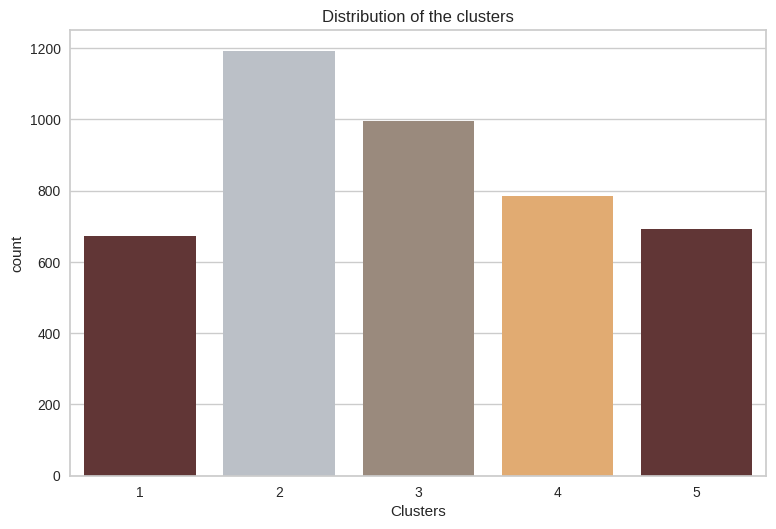

In [ ]:
#plotting the countplot of clusters
pal=["#682F2F","#B9C0C9","#9F8A78","#F3AB60"]
pl=sns.countplot(x=rfm_normalized_km['Clusters'],palette=pal)
pl.set_title("Distribution of the clusters")
plt.show()

## **HIERARCHICAL CLUSTERING**

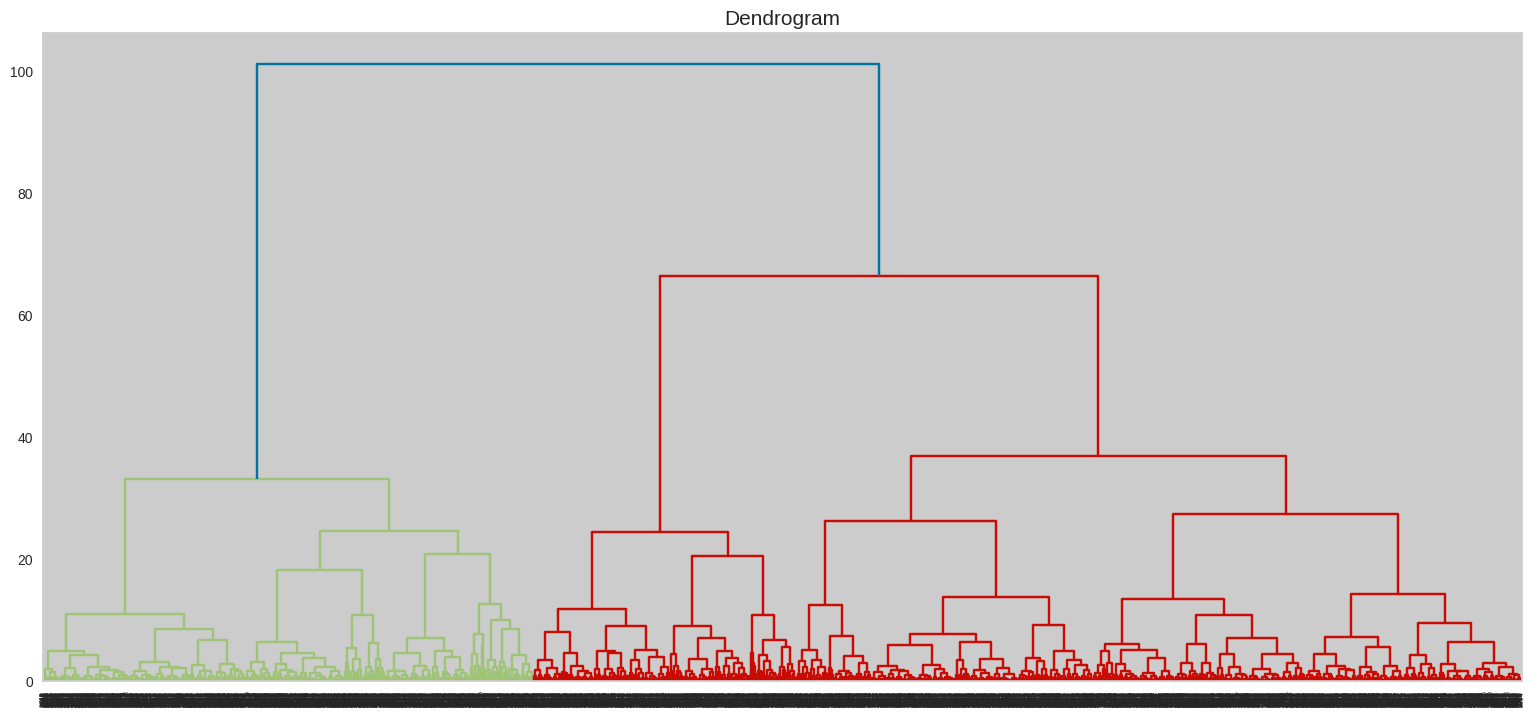

In [ ]:
#Agglomerative clustering
#visualizing the Dendogram
from scipy.cluster.hierarchy import dendrogram,linkage
plt.figure(figsize=(17,8))
dendo=dendrogram(linkage(rfm_normalized_ac,method='ward'))
plt.title('Dendrogram',fontsize=15)
plt.show()

In [ ]:
#Agglomerative clustering
from sklearn.cluster import AgglomerativeClustering
AC=AgglomerativeClustering(n_clusters=3)
y_AC=AC.fit_predict(rfm_normalized_ac)
rfm_normalized_ac=pd.DataFrame(rfm_normalized_ac)
rfm_normalized_ac['Clusters']=y_AC
rfm_normalized_ac.head()

,Recency,Frequency,Monetary,Clusters
0,1.435416,-2.779979,3.700201,1
1,-1.953393,1.160357,1.413257,2
2,0.382865,-0.179855,0.719951,0
3,-0.619183,0.468643,0.702251,0
4,1.401368,-0.634745,-0.612996,1


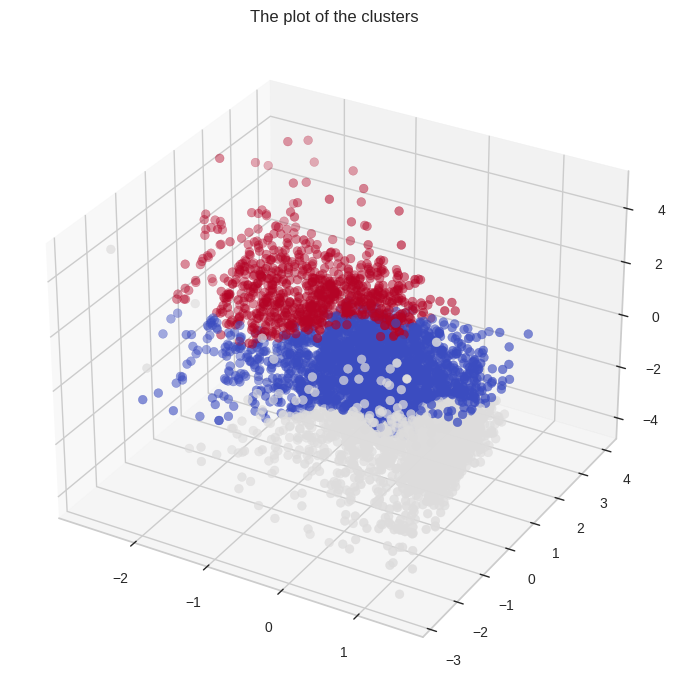

In [ ]:
#plotting the clusters
fig=plt.figure(figsize=(10,8))
ax=plt.subplot(111,projection='3d',label="bla")
ax.scatter(rfm_normalized_ac['Recency'],rfm_normalized_ac['Frequency'],rfm_normalized_ac['Monetary'],s=40,c=rfm_normalized_ac['Clusters'],marker='o',cmap='coolwarm')
ax.set_title("The plot of the clusters")
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score
silhouette=silhouette_score(rfm_normalized_ac,rfm_normalized_ac['Clusters'])
silhouette

0.4220416762573206

<ipython-input-174-e2520e504d5b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  pl=sns.countplot(x=rfm_normalized_ac['Clusters'],palette=pal)
<ipython-input-174-e2520e504d5b>:3: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  pl=sns.countplot(x=rfm_normalized_ac['Clusters'],palette=pal)


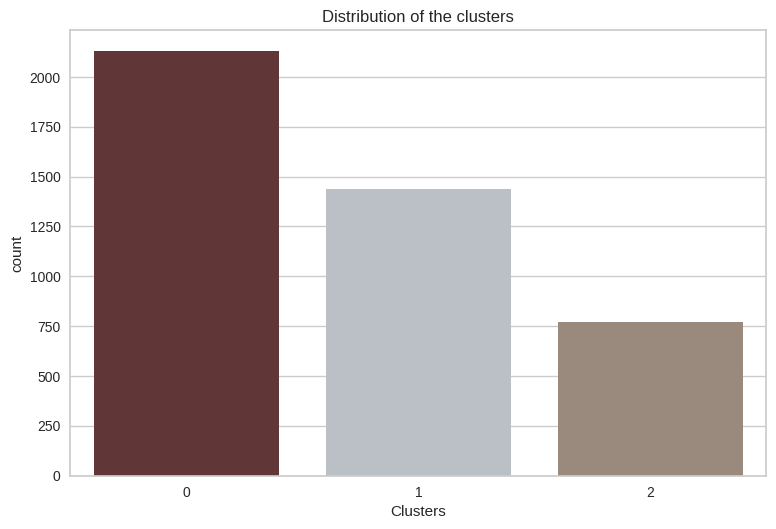

In [ ]:
#plotting the countplot of clusters
pal=["#682F2F","#B9C0C9","#9F8A78","#F3AB60"]
pl=sns.countplot(x=rfm_normalized_ac['Clusters'],palette=pal)
pl.set_title("Distribution of the clusters")
plt.show()

The clusters seems to be fairly distributed

In [ ]:
# Calculating the mean of each clusters
rfm['cluster_labels']=(kmeans.labels_+1)
rfm.groupby('cluster_labels').agg({'Recency':'mean','Frequency':'mean','Monetary':['mean','count']}).round(0)

Recency Frequency Monetary      
                  mean      mean     mean count
cluster_labels                                 
1                 13.0     490.0  15377.0   298
2                 17.0      45.0    706.0   841
3                 59.0     120.0   2128.0  1447
4                172.0      27.0    455.0  1122
5                171.0       6.0    193.0   630

In [ ]:
rfm_vip = rfm[(rfm["cluster_labels"] == 1) & (rfm["Frequency"] >= rfm["Frequency"].quantile(0.95)) & (rfm["Monetary"] >=rfm["Monetary"].quantile(0.95))& (rfm["Recency"] <= rfm["Recency"].quantile(0.30))]

In [ ]:
VIP_clients=rfm_vip[["Recency","Frequency","Monetary"]]
VIP_clients

,Recency,Frequency,Monetary
CustomerID,,,
12433.0,1,420,13375.87
12451.0,11,354,9035.52
12471.0,3,459,19788.65
12474.0,18,422,7324.09
12540.0,20,478,13400.24
...,...,...,...
17811.0,5,828,7761.82
17841.0,2,7676,40519.84
18055.0,8,358,6761.34


### **EXPLANATION:**
These VIP clients are constantly shopping with us spending large sums of money and it has not been long since their last purchase

### **MARKETING STRATEGY:**
1.Exclusive Offers and Discounts:

Provide VIP-only promotions, discounts, or early access to sales. This makes them feel valued and appreciated.

2.Dedicated Support:

Offer a dedicated customer support channel for VIP customers. Ensure quick responses and personalized assistance.